In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
import torch
import torch.utils.data
# from torchvision import datasets, transforms
import numpy as np
import argparse
from udlp.autoencoder.denoisingAutoencoder import DenoisingAutoencoder
from pacdataset import PacDataset
from matplotlib import pyplot as plt

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [16]:
batch_size = 4
lr = 0.001
epochs = 2

# Set up datasets and data loader

In [2]:
# "/Users/josephmann/Documents/Gheiratmand/sMRI competition/PAC Data/pac2018/"


batch_size = 4
datasets = {x: PacDataset(train=(x=='train'), 
                          root_dir = "/home/paperspace/data/pac2018/") 
#                           root_dir = "/Users/josephmann/Documents/Gheiratmand/sMRI competition/PAC Data/pac2018/") 
            for x in ['val','train']}

train_loader = torch.utils.data.DataLoader(
    datasets['train'],
    batch_size= batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    datasets['val'],
    batch_size= batch_size, shuffle=False, num_workers=2)

# DEA with PAC

In [4]:
in_features = 17545
out_features = 500
dae = DenoisingAutoencoder(in_features, out_features)
dae.fit(train_loader, test_loader, lr=lr, num_epochs=epochs, loss_type="cross-entropy")

=====Denoising Autoencoding layer=======
####Epoch 0: Valid Reconstruct Loss: 12178.442
#Epoch   1: Reconstruct Loss: 3526.964, Valid Reconstruct Loss: 3396.527
#Epoch   2: Reconstruct Loss: 3340.605, Valid Reconstruct Loss: 3518.410


# SDEA with PAC

In [5]:
from udlp.autoencoder.stackedDAE import StackedDAE


In [6]:
# in_features = 784
in_features = 17545
out_features = 500
pretrainepochs = 10 
epochs = 10
z_dim = 50
batch_size = 32

sdae = StackedDAE(input_dim=in_features, z_dim=z_dim, binary=True,
    encodeLayer=[4000,1000,500], decodeLayer=[500,1000,4000], activation="relu", 
    dropout=0)

In [38]:
sdae.pretrain(train_loader, test_loader, lr=lr, batch_size= batch_size, 
    num_epochs=pretrainepochs, corrupt=0, loss_type="mse")
sdae.save_model("model/sdae.pt")
sdae.fit(train_loader, test_loader, lr= lr, 
         num_epochs= epochs, corrupt=0, loss_type="mse") # loss_type was cross-entropy

l is  1
=====Denoising Autoencoding layer=======
####Epoch 0: Valid Reconstruct Loss: 1847.319
#Epoch   1: Reconstruct Loss: 549.482, Valid Reconstruct Loss: 227.413
#Epoch   2: Reconstruct Loss: 222.188, Valid Reconstruct Loss: 211.631
#Epoch   3: Reconstruct Loss: 212.627, Valid Reconstruct Loss: 208.883
#Epoch   4: Reconstruct Loss: 204.720, Valid Reconstruct Loss: 202.112
#Epoch   5: Reconstruct Loss: 196.806, Valid Reconstruct Loss: 196.183
#Epoch   6: Reconstruct Loss: 191.903, Valid Reconstruct Loss: 192.537
#Epoch   7: Reconstruct Loss: 192.222, Valid Reconstruct Loss: 196.897
#Epoch   8: Reconstruct Loss: 194.319, Valid Reconstruct Loss: 198.623
#Epoch   9: Reconstruct Loss: 197.907, Valid Reconstruct Loss: 199.644
#Epoch  10: Reconstruct Loss: 197.046, Valid Reconstruct Loss: 198.970
type(data_x) <class 'torch.FloatTensor'>
type(valid_x) <class 'torch.FloatTensor'>
l is  2
=====Denoising Autoencoding layer=======
####Epoch 0: Valid Reconstruct Loss: 121.725
#Epoch   1: Recons

In [39]:
sdae.save_model("model/pre_vade.pt")

In [5]:
sdae.load_model("model/pre_vade.pt")

NameError: name 'sdae' is not defined

In [7]:
sdae.fit(train_loader, test_loader, lr= lr, num_epochs= 2, corrupt=0, loss_type="mse")


=====Stacked Denoising Autoencoding layer=======
#Epoch 0: Valid Reconstruct Loss: 3171.951
#Epoch   1: Reconstruct Loss: 3098.990, Valid Reconstruct Loss: 3227.578
#Epoch   2: Reconstruct Loss: 3153.147, Valid Reconstruct Loss: 3326.823


## Visualize a reconstruction...

inputs shape torch.Size([4, 17545])
min val for image: 9 0.0
4
0 (4, 121, 145)
inputs shape torch.Size([4, 17545])
min val for image: 9 0.0
4
1 (4, 121, 145)
inputs shape torch.Size([4, 17545])
min val for image: 9 0.0
4
2 (4, 121, 145)
inputs shape torch.Size([4, 17545])
min val for image: 9 0.0
4
3 (4, 121, 145)
inputs shape torch.Size([4, 17545])
min val for image: 9 0.0
4
4 (4, 121, 145)


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


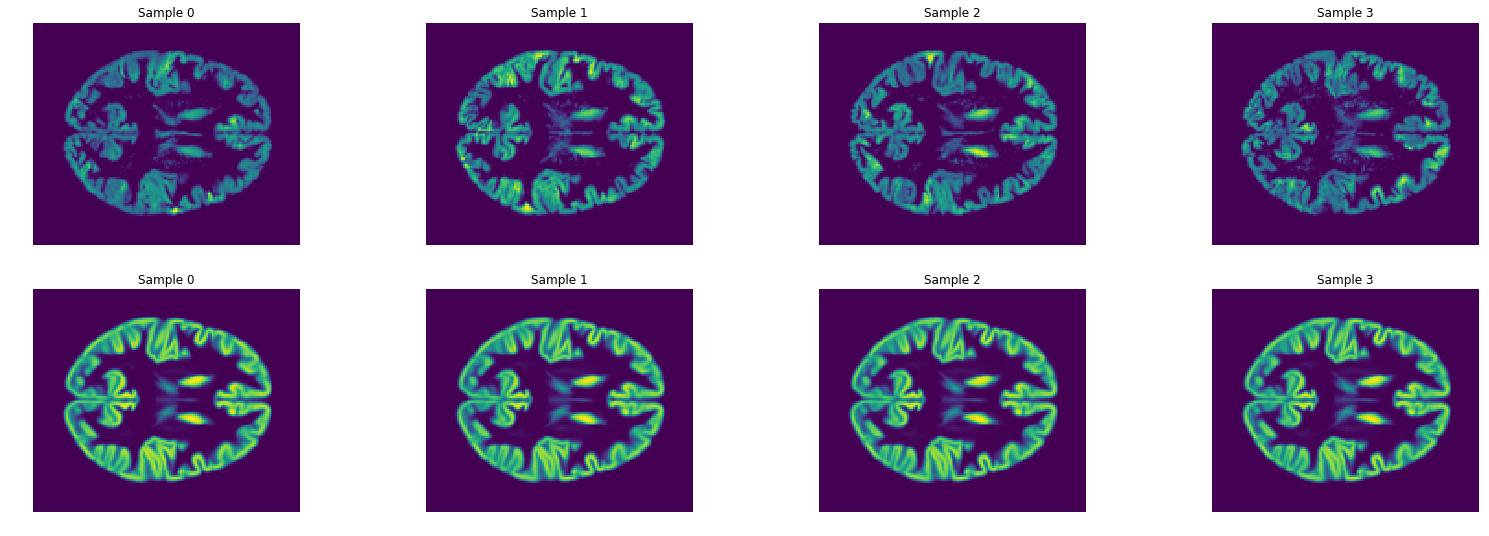

In [40]:
# face_dataset = FaceLandmarksDataset(csv_file='faces/face_landmarks.csv',
#                                     root_dir='faces/')
from matplotlib import pyplot as plt
from torch.autograd import Variable
fig = plt.figure(figsize=(12,12))

batch_size= 4
use_cuda = torch.cuda.is_available()
# for i in range(4): #len(datasets[0])):
figure = plt.figure(figsize=(27, 9))
for batch_idx, inputs in enumerate(train_loader):    
    if batch_idx > 4: 
        continue
    print("inputs shape", inputs.shape)
#     inputs = datasets['train'][i]
    print('min val for image:', i ,inputs.min())

    inputs = inputs.view(inputs.size(0), -1).float()
    print(len(inputs))
    if use_cuda:
        inputs = inputs.cuda()
    inputs = Variable(inputs)
    z, outputs = sdae.forward(inputs)
#     f_sample = sdae.forward(datasets['train'][i])
    sample = inputs.data.cpu().numpy().reshape(batch_size, 121,145)
    sample_out = outputs.data.cpu().numpy().reshape(batch_size, 121,145)

    print(batch_idx, sample.shape)
    i = 1
    for b_idx in range(batch_size):
        
        ax = plt.subplot(2, 4, i)
        ax.set_title(f'Sample {b_idx}')
        ax.axis('off')
        ax.imshow(sample[b_idx])
        i += 1
        
    for b_idx in range(batch_size):
        ax = plt.subplot(2, 4, i)
        ax.set_title(f'Sample {b_idx}')
        ax.axis('off')
        ax.imshow(sample_out[b_idx])
        i += 1

plt.show()

 

In [18]:
121*145*121


2122945

# Test VaDE with PAC and pre-trained model
just for file format



In [7]:
# "/Users/josephmann/Documents/Gheiratmand/sMRI competition/PAC Data/pac2018/"


batch_size = 4
datasets = {x: PacDataset(train=(x=='train'), 
                          root_dir = "/home/paperspace/data/pac2018/") 
#                           root_dir = "/Users/josephmann/Documents/Gheiratmand/sMRI competition/PAC Data/pac2018/") 
            for x in ['val','train']}

train_loader = torch.utils.data.DataLoader(
    datasets['train'],
    batch_size= batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    datasets['val'],
    batch_size= batch_size, shuffle=False, num_workers=2)

In [8]:
# lets try to extract our latent var and see if we can run gmm on it


In [23]:
from udlp.clustering.vade import VaDE
args_pretrain = 'model/pre_vade.pt'

in_features = 17545
out_features = 500
pretrainepochs = 20 
epochs = 2
z_dim = 50

lr = 0.001

vade = VaDE(input_dim=in_features, z_dim=z_dim, n_centroids=3, binary=True,
        encodeLayer=[4000,1000,500], decodeLayer=[500,1000,4000], debug=True)

if args_pretrain != "":
    print("Loading model from %s..." % args_pretrain)
    vade.load_model(args_pretrain)
print("Initializing through GMM..")
data = vade.initialize_gmm(train_loader)

Loading model from model/pre_vade.pt...
Initializing through GMM..
starting forward loop ***************
z size = torch.Size([4, 50])
outputs size = torch.Size([4, 17545])
mu size = torch.Size([4, 50])
logvar size = torch.Size([4, 50])
z size = torch.Size([4, 50])
outputs size = torch.Size([4, 17545])
mu size = torch.Size([4, 50])
logvar size = torch.Size([4, 50])
ending forward loop ***************
in initialize_gmm: data.shape = (1254, 50)
self.u_p = torch.Size([50, 3])


In [23]:
data.shape

AttributeError: 'NoneType' object has no attribute 'shape'

In [10]:
data[:10,:]

array([[ 3.74959335e-02, -1.87288970e-02,  4.56816666e-02,
         1.49927080e-01,  8.46217573e-03, -4.01240811e-02,
         6.17578626e-04, -6.39512241e-01, -4.59812805e-02,
        -1.00963032e+00, -1.21399555e-02,  3.61135229e-02,
        -3.11819967e-02,  6.82947040e-02, -7.37628713e-02,
         1.35148287e-01,  3.60849127e-02, -1.47889566e+00,
        -1.89971536e-01, -2.18913108e-01,  8.97676274e-02,
        -2.61688828e-01,  3.34253237e-02, -1.52014777e-01,
         1.06594451e-02, -1.57506853e-01, -2.87570655e-02,
        -5.49773239e-02, -2.54047941e-02,  3.92443761e-02,
        -5.62333226e-01,  3.33891027e-02,  2.70604879e-01,
        -5.51130772e-01,  9.47726816e-02,  4.70509380e-03,
        -4.73454148e-02, -2.97589004e-02, -1.14110429e-02,
        -4.80119623e-02,  4.58306819e-02, -3.53600681e-02,
         6.42415285e-01,  2.00165436e-03, -3.91614646e-01,
         7.11744547e-01,  1.01488996e-02,  2.53105853e-02,
        -4.88756821e-02,  6.25774264e-02],
       [-1.96

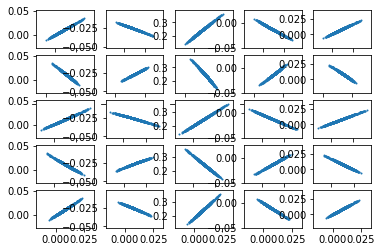

In [4]:
plt.figure
k = 1
for i,j in [(k,l) for k in range(5) for l in range(5)]:
    ax = plt.subplot(5, 5, k)
    ax.scatter(data[:,i],data[:,j], s=1)
    k += 1 

In [24]:
print("starting fit *************")
vade.fit(train_loader, test_loader, lr=lr, 
         batch_size=batch_size, num_epochs=epochs, anneal=True)

starting fit *************
z size : torch.Size([4, 50])
outputs size : torch.Size([4, 17545])
inputs size : torch.Size([4, 17545])
mu size : torch.Size([4, 50])
p_c_z = Variable containing:
 1.1531e+24  7.6934e+06         inf
 2.0471e+18         inf  1.1307e+17
        inf  1.0089e+38  6.8234e+14
        inf  3.3348e-01  7.1070e+28
[torch.cuda.FloatTensor of size 4x3 (GPU 0)]

log_tot_mass.max() = Variable containing:
 5.2944
[torch.cuda.FloatTensor of size 1 (GPU 0)]

log_num.max() = Variable containing:
1.00000e-05 *
 -1.6009
[torch.cuda.FloatTensor of size 1 (GPU 0)]

log_tot_mass.min() = Variable containing:
 0.4486
[torch.cuda.FloatTensor of size 1 (GPU 0)]

log_num.min() = Variable containing:
-6.0332
[torch.cuda.FloatTensor of size 1 (GPU 0)]

N() = - log_tot_mass - log_num = Variable containing:
(0 ,.,.) = 
 -1.0304  2.0577 -1.3410
 -2.4949 -2.4182 -2.2909
  0.2321 -1.6518 -3.6740
  0.9534  1.8712 -1.4800
 -3.6428 -0.8871 -2.2707

(1 ,.,.) = 
 -2.6795 -0.9495  0.6605
  0.6556 -

In [41]:
vade.save_model("model/vade2k5c5c_1.pt")

In [37]:
vade.load_model("model/vade1.pt")
print("Initializing through GMM..")
batch_size = 32
vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

In [59]:
from udlp.clustering.vade import VaDE
args_pretrain = 'model/pre_vade.pt'

vade = VaDE(input_dim=in_features, z_dim=20, n_centroids=50, binary=True,
        encodeLayer=[2000,500,2000], decodeLayer=[2000,500,2000])

lr = 0.0003

if args_pretrain != "":
    print("Loading model from %s..." % args_pretrain)
    vade.load_model(args_pretrain)
print("Initializing through GMM..")
vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

Loading model from model/pre_vade.pt...


RuntimeError: While copying the parameter named encoder.0.weight, whose dimensions in the model are torch.Size([2000, 17545]) and whose dimensions in the checkpoint are torch.Size([4000, 17545]).

In [51]:
from udlp.clustering.vade import VaDE
args_pretrain = 'model/pre_vade.pt'

z_dim = 20
n_centroids = 20
vade = VaDE(input_dim=in_features, z_dim=z_dim, n_centroids=n_centroids, binary=True,
        encodeLayer=[2000,500,2000], decodeLayer=[2000,500,2000])

# if args_pretrain != "":
#     print("Loading model from %s..." % args_pretrain)
#     vade.load_model(args_pretrain)
print("Initializing through GMM..")
vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

Initializing through GMM..
#Epoch -1: Valid Loss: nan
#Epoch   0: lr: 0.00100, Train Loss: 6242.55512, Valid Loss: 3307.95430, acc: 0.00000
#Epoch   1: lr: 0.00100, Train Loss: 3317.17495, Valid Loss: 3339.55438, acc: 0.00000
#Epoch   2: lr: 0.00100, Train Loss: 3308.81975, Valid Loss: 3289.09791, acc: 0.00000
#Epoch   3: lr: 0.00100, Train Loss: 3303.23821, Valid Loss: 3262.72100, acc: 0.00000
#Epoch   4: lr: 0.00100, Train Loss: 3311.81923, Valid Loss: 3269.18336, acc: 0.00000
#Epoch   5: lr: 0.00100, Train Loss: 3293.82434, Valid Loss: 3321.69122, acc: 0.00000
#Epoch   6: lr: 0.00100, Train Loss: 3287.29481, Valid Loss: 3243.17547, acc: 0.00000
#Epoch   7: lr: 0.00100, Train Loss: 3272.09096, Valid Loss: 3257.97516, acc: 0.00000
#Epoch   8: lr: 0.00100, Train Loss: 3269.02134, Valid Loss: 3237.02857, acc: 0.00000
#Epoch   9: lr: 0.00100, Train Loss: 3261.04076, Valid Loss: 3233.40067, acc: 0.00000
#Epoch  10: lr: 0.00090, Train Loss: 3260.28980, Valid Loss: 3232.83958, acc: 0.00000


In [52]:
vade.save_model("model/vade2k5c2k_2020_1.pt")

In [54]:
vade.load_model("model/vade2k5c2k_2020_1.pt")
vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

#Epoch -1: Valid Loss: nan
#Epoch   0: lr: 0.00100, Train Loss: 3311.62904, Valid Loss: 3223.40162, acc: 0.00000
#Epoch   1: lr: 0.00100, Train Loss: nan, Valid Loss: nan, acc: 0.00000


Process Process-1772:
  File "/home/paperspace/github/UnsupervisedDeepLearning-Pytorch/test/pacdataset.py", line 15, in _jload
    img_data = img.get_data()
Process Process-1771:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 55, in _worker_loop
    samples = collate_fn([dataset[i] for i in batch_indices])
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 55, in <listcomp>
    samples = c

KeyboardInterrupt: 

  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/nibabel/dataobj_images.py", line 202, in get_data
    data = np.asanyarray(self._dataobj)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/nibabel/volumeutils.py", line 965, in apply_read_scaling
    arr = arr * slope
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/numeric.py", line 544, in asanyarray
    return array(a, dtype, copy=False, order=order, subok=True)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/memmap.py", line 319, in __array_wrap__
    def __array_wrap__(self, arr, context=None):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/nibabel/arrayproxy.py", line 291, in __array__
    return apply_read_scaling(raw_data, self._slope, self._inter)
KeyboardInterrupt
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/nibabel/volumeutils.py", line 965, in 

In [44]:
vade.save_model("model/vade2k5c2k_1.pt")

In [45]:
vade.load_model("model/vade2k5c2k_1.pt")
print("Initializing through GMM..")
lr = 0.001
batch_size = 32
vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

Initializing through GMM..
#Epoch -1: Valid Loss: 6526.86497
#Epoch   0: lr: 0.00100, Train Loss: 3262.76987, Valid Loss: 3232.34285, acc: 0.00000
#Epoch   1: lr: 0.00100, Train Loss: 3242.06520, Valid Loss: 3211.50148, acc: 0.00000
#Epoch   2: lr: 0.00100, Train Loss: 3242.81475, Valid Loss: 3210.97557, acc: 0.00000
#Epoch   3: lr: 0.00100, Train Loss: 3236.35666, Valid Loss: 3204.28867, acc: 0.00000
#Epoch   4: lr: 0.00100, Train Loss: 3235.02464, Valid Loss: 3200.39091, acc: 0.00000
#Epoch   5: lr: 0.00100, Train Loss: 3247.62324, Valid Loss: 3212.14897, acc: 0.00000
#Epoch   6: lr: 0.00100, Train Loss: 3234.69476, Valid Loss: 3191.59323, acc: 0.00000
#Epoch   7: lr: 0.00100, Train Loss: 3224.14547, Valid Loss: 3188.05998, acc: 0.00000
#Epoch   8: lr: 0.00100, Train Loss: 3223.49146, Valid Loss: 3187.75288, acc: 0.00000
#Epoch   9: lr: 0.00100, Train Loss: 3220.72840, Valid Loss: 3191.08219, acc: 0.00000
#Epoch  10: lr: 0.00090, Train Loss: 3217.33778, Valid Loss: 3184.41324, acc: 0

In [46]:
vade.save_model("model/vade2k5c2k_2.pt")

In [48]:
vade.load_model("model/vade2k5c2k_2.pt")
print("Initializing through GMM..")
lr = 0.001
batch_size = 32
vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

Initializing through GMM..
#Epoch -1: Valid Loss: 8679.95242
#Epoch   0: lr: 0.00100, Train Loss: 3233.41579, Valid Loss: 3186.49018, acc: 0.00000
#Epoch   1: lr: 0.00100, Train Loss: 3209.28563, Valid Loss: 3183.59263, acc: 0.00000
#Epoch   2: lr: 0.00100, Train Loss: 3211.07545, Valid Loss: 3183.09875, acc: 0.00000
#Epoch   3: lr: 0.00100, Train Loss: 3211.02946, Valid Loss: 3182.68724, acc: 0.00000
#Epoch   4: lr: 0.00100, Train Loss: 3211.01418, Valid Loss: 3182.51615, acc: 0.00000
#Epoch   5: lr: 0.00100, Train Loss: 3209.16660, Valid Loss: 3183.76033, acc: 0.00000
#Epoch   6: lr: 0.00100, Train Loss: 3208.18500, Valid Loss: 3181.53952, acc: 0.00000
#Epoch   7: lr: 0.00100, Train Loss: 3210.69156, Valid Loss: 3182.22657, acc: 0.00000
#Epoch   8: lr: 0.00100, Train Loss: 3216.56231, Valid Loss: 3192.80368, acc: 0.00000
#Epoch   9: lr: 0.00100, Train Loss: 3228.06418, Valid Loss: 3204.26479, acc: 0.00000
#Epoch  10: lr: 0.00090, Train Loss: 3213.43192, Valid Loss: 3181.38049, acc: 0

In [49]:
vade.save_model("model/vade2k5c2k_3.pt")

In [50]:
vade.load_model("model/vade2k5c2k_3.pt")
print("Initializing through GMM..")
lr = 0.001
batch_size = 32
vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

Initializing through GMM..
#Epoch -1: Valid Loss: 13186.21874
#Epoch   0: lr: 0.00100, Train Loss: 3230.66995, Valid Loss: 3191.42460, acc: 0.00000
#Epoch   1: lr: 0.00100, Train Loss: 3198.93020, Valid Loss: 3182.39906, acc: 0.00000
#Epoch   2: lr: 0.00100, Train Loss: 3200.67083, Valid Loss: 3181.66593, acc: 0.00000
#Epoch   3: lr: 0.00100, Train Loss: 3199.40258, Valid Loss: 3183.60423, acc: 0.00000
#Epoch   4: lr: 0.00100, Train Loss: 3195.83137, Valid Loss: 3179.73581, acc: 0.00000
#Epoch   5: lr: 0.00100, Train Loss: 3197.30092, Valid Loss: 3181.60865, acc: 0.00000
#Epoch   6: lr: 0.00100, Train Loss: 3194.53059, Valid Loss: 3180.47269, acc: 0.00000
#Epoch   7: lr: 0.00100, Train Loss: 3202.62261, Valid Loss: 3182.16113, acc: 0.00000
#Epoch   8: lr: 0.00100, Train Loss: 3194.71276, Valid Loss: 3183.98300, acc: 0.00000
#Epoch   9: lr: 0.00100, Train Loss: 3197.05575, Valid Loss: 3185.75998, acc: 0.00000
#Epoch  10: lr: 0.00090, Train Loss: 3194.80184, Valid Loss: 3179.34724, acc: 

> I don't know the number of centroids does...

In [47]:
vade.load_model("model/vade2k5c2k_1.pt")
print("Initializing through GMM..")
lr = 0.001
batch_size = 32
# we do NOT want to initialize_gmm each time, oh wait, yes we do.
# vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

Initializing through GMM..
#Epoch -1: Valid Loss: 3219.21289
#Epoch   0: lr: 0.00100, Train Loss: nan, Valid Loss: nan, acc: 0.00000
#Epoch   1: lr: 0.00100, Train Loss: nan, Valid Loss: nan, acc: 0.00000
#Epoch   2: lr: 0.00100, Train Loss: nan, Valid Loss: nan, acc: 0.00000
#Epoch   3: lr: 0.00100, Train Loss: nan, Valid Loss: nan, acc: 0.00000
#Epoch   4: lr: 0.00100, Train Loss: nan, Valid Loss: nan, acc: 0.00000


Process Process-1496:
Process Process-1495:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 50, in _worker_loop
    r = index_queue.get()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 335, in get
    res = self._reader.recv_bytes()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/paperspace/anaconda3/envs/fa

KeyboardInterrupt: 

In [32]:
# batch_size = 8
# vade.load_model("model/vade1.pt")
# print("Initializing through GMM..")
# vade.initialize_gmm(train_loader)
vade.fit(train_loader, test_loader, lr=lr, batch_size=batch_size, num_epochs=epochs, anneal=True)

#Epoch -1: Valid Loss: 3208.37063
#Epoch   0: lr: 0.00100, Train Loss: 3107.86518, Valid Loss: 3172.76114, acc: 0.00000
#Epoch   1: lr: 0.00100, Train Loss: 3110.91332, Valid Loss: 3176.45886, acc: 0.00000
#Epoch   2: lr: 0.00100, Train Loss: 3110.19600, Valid Loss: 3178.79659, acc: 0.00000
#Epoch   3: lr: 0.00100, Train Loss: 3104.94653, Valid Loss: 3183.62467, acc: 0.00000
#Epoch   4: lr: 0.00100, Train Loss: 3118.62083, Valid Loss: 3178.66328, acc: 0.00000
#Epoch   5: lr: 0.00100, Train Loss: 3114.10822, Valid Loss: 3199.02968, acc: 0.00000
#Epoch   6: lr: 0.00100, Train Loss: 3120.37661, Valid Loss: 3173.95579, acc: 0.00000
#Epoch   7: lr: 0.00100, Train Loss: 3107.35450, Valid Loss: 3185.31540, acc: 0.00000
#Epoch   8: lr: 0.00100, Train Loss: 3095.57662, Valid Loss: 3168.91423, acc: 0.00000
#Epoch   9: lr: 0.00100, Train Loss: 3088.22531, Valid Loss: 3190.91982, acc: 0.00000
#Epoch  10: lr: 0.00090, Train Loss: 3084.56503, Valid Loss: 3168.53700, acc: 0.00000
#Epoch  11: lr: 0.00